In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
data = pd.read_csv(r"/home/mitraa/Jupyter Notebook/MLP/P1/Gold Price Prediction/gld_price_data.csv")

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
data.shape

(2290, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

    1.Positive Correlation
    2.Negative Correlation

In [10]:
correlation = data.corr()

<AxesSubplot:>

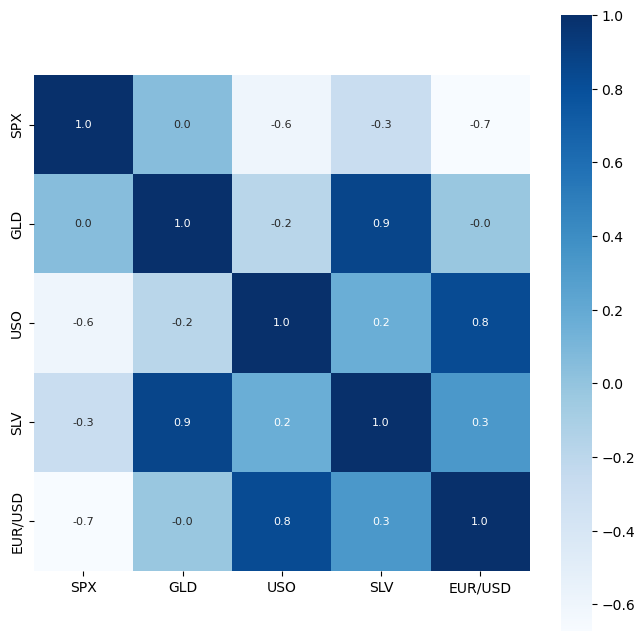

In [11]:
# constructing a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8}, cmap='Blues')

In [12]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Count'>

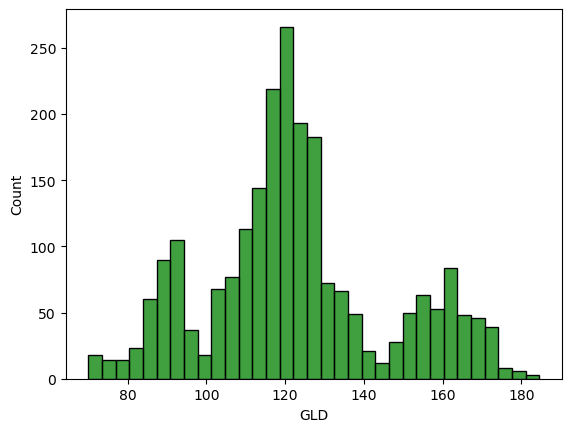

In [14]:
sns.histplot(data['GLD'],color='green')

Splitting the features and target

In [15]:
X = data.drop(['Date', 'GLD'],axis=1)
Y = data['GLD']

In [16]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

Model training:
    
    Random Forest Regression

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

model evaluation

In [20]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.64089922  82.34219972 116.15430045 127.56470051 120.81660135
 154.69189722 150.3985989  126.17930012 117.44369899 126.05380041
 116.56370084 171.56440093 142.17009933 167.50029854 115.1292001
 117.72730055 139.13380327 170.10660071 159.3127023  161.47499993
 155.12840007 125.2583002  176.37119977 157.78750371 125.20740041
  93.86739998  77.42700008 120.32740004 119.08609939 167.56439973
  88.13720015 125.27660016  91.1619007  117.68430012 121.12469909
 136.13920084 115.67810129 115.21130055 146.42089951 107.28960101
 104.45640282  87.09459789 126.51630055 118.0834998  154.37109931
 119.80210004 108.3237     108.19579823  93.28580084 127.22039759
  74.68870052 113.73179959 121.10730028 111.33909904 118.90369859
 120.49419963 158.69019999 167.14490081 146.93249661  86.03569868
  94.30030048  86.79609875  90.64140011 119.1178005  126.52310044
 127.60299996 170.15729965 122.33869926 117.291699    98.1398002
 168.33320196 143.23089895 131.93990274 121.29810207 121.36139953
 119.6482008

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.9893437998892429


Compare the actual values and predicted values in a plot

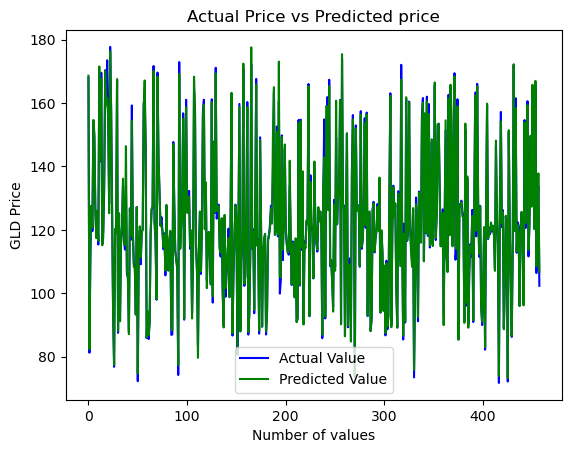

In [23]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()